In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
print("Numpy version",np.__version__)
print("Panda version",pd.__version__)

Numpy version 1.19.2
Panda version 1.1.3


In [113]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
# Percentage of male survivors

In [16]:
# Total number of males
df[df['Sex']=='male'].count()['Age']

453

In [17]:
np.where((df['Age']=='male') & (df['Survived']=='1'))

(array([], dtype=int64),)

In [18]:
df.groupby('Age')['Survived'].sum()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    0
70.50    0
71.00    0
74.00    0
80.00    1
Name: Survived, Length: 88, dtype: int64

### Checking for missing values

In [19]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
df.isnull().sum()[df.isnull().sum()>0]

Cabin    687
dtype: int64

### Missing value treatment

In [118]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [119]:
df['Embarked'].mode()

0    S
dtype: object

In [117]:
df['Embarked'].replace(np.nan,df['Embarked'].mode().values[0],inplace=True)

<AxesSubplot:xlabel='Age'>

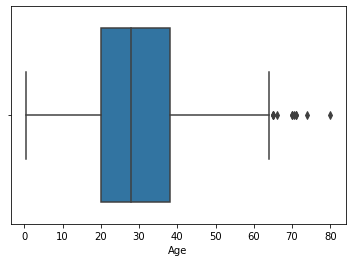

In [134]:
sns.boxplot(df['Age'])

In [132]:
df['Age'].median()

28.0

In [136]:
df['Age'].replace(np.nan,df['Age'].median,inplace=True)

### Checking for duplicates

In [64]:
df.duplicated().sum()

0

### Checking for outliers

<AxesSubplot:xlabel='Survived', ylabel='Age'>

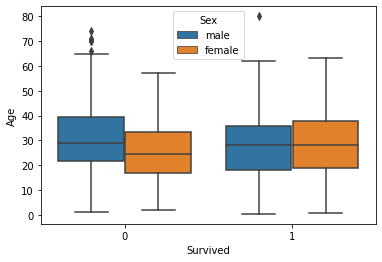

In [20]:
sns.boxplot(y=df['Age'],x=df['Survived'],hue=df['Sex'])

<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

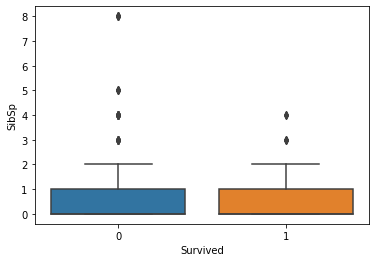

In [21]:
sns.boxplot(y=df['SibSp'],x=df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

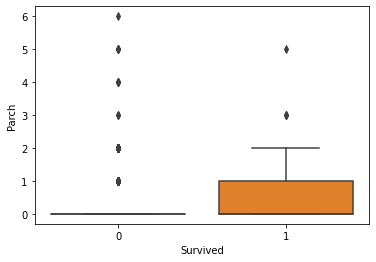

In [22]:
sns.boxplot(y=df['Parch'],x=df['Survived'])

In [23]:
df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [24]:
# Percentage of women who survived
TotalWomen = df[df['Sex']=='female']['PassengerId'].count()
print(TotalWomen)
print("Percentage of women who survived",round((233/314)*100))

314
Percentage of women who survived 74


In [25]:
# Percentage of men who survived
Totalmen = df[df['Sex']=='male']['PassengerId'].count()
print(Totalmen)
print("Percentage of men who survived",round((109/577)*100))

577
Percentage of men who survived 19


In [26]:
233/len(df['Sex']=='female')

0.2615039281705948

In [27]:
df2= pd.read_csv("test.csv")
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Outlier treatment

### Checking for correlations

In [66]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

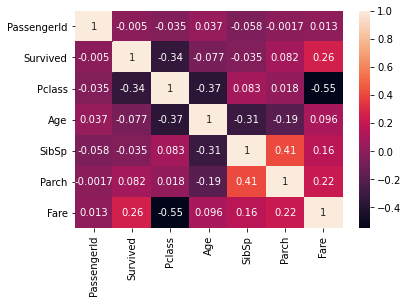

In [70]:
sns.heatmap(df.corr(),annot=True)

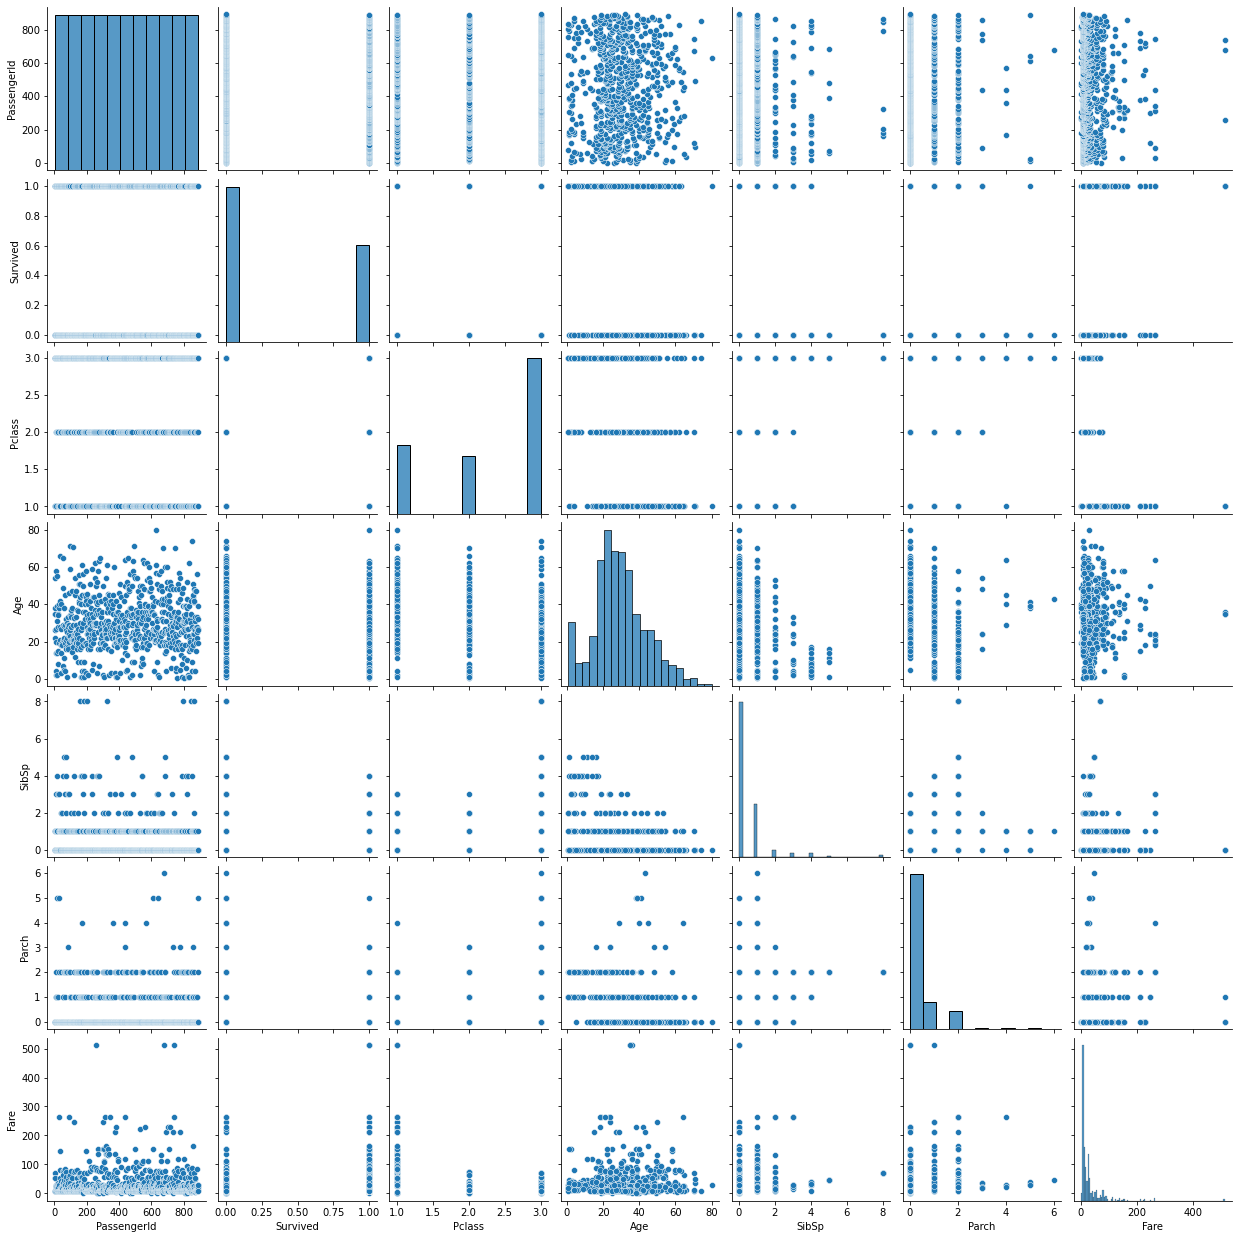

In [65]:
sns.pairplot(df)

### Converting all objects to categorical codes

In [121]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [122]:
df['Sex'] = np.where(df['Sex']=='male','1',df['Sex'])
df['Sex'] = np.where(df['Sex']=='female','2',df['Sex'])

In [137]:
df['Sex'].value_counts()

1    577
2    314
Name: Sex, dtype: int64

In [124]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [125]:
df['Embarked'] = np.where(df['Embarked']=='S','1',df['Embarked'])
df['Embarked'] = np.where(df['Embarked']=='C','2',df['Embarked'])
df['Embarked'] = np.where(df['Embarked']=='Q','3',df['Embarked'])

In [126]:
df['Sex'] = df['Sex'].astype('int64')
df['Embarked'] = df['Embarked'].astype('int64')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


## Random Forest

In [29]:
y_train=df['Survived']

features =['Pclass','Sex','SibSp','Parch']
X_train=pd.get_dummies(df[features])
X_test= pd.get_dummies(df2[features])
model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=123)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': predictions})
output.to_csv('RF_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [30]:
model.score(X_train,y_train)

0.8148148148148148

## Neural Network

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [32]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_train)

Iteration 1, loss = 0.65384767
Iteration 2, loss = 0.64890464
Iteration 3, loss = 0.64150265
Iteration 4, loss = 0.63321163
Iteration 5, loss = 0.62421337
Iteration 6, loss = 0.61544131
Iteration 7, loss = 0.60700285
Iteration 8, loss = 0.59866914
Iteration 9, loss = 0.59112580
Iteration 10, loss = 0.58367351
Iteration 11, loss = 0.57697988
Iteration 12, loss = 0.57024853
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [33]:
confusion_matrix(y_train,y_pred)

array([[537,  12],
       [192, 150]], dtype=int64)

In [34]:
clf.score(X_train,y_train)

0.7710437710437711

In [35]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       549
           1       0.93      0.44      0.60       342

    accuracy                           0.77       891
   macro avg       0.83      0.71      0.72       891
weighted avg       0.81      0.77      0.75       891



AUC: 0.826


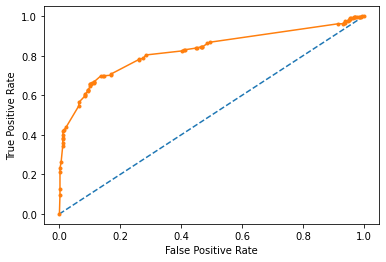

In [36]:
probs = clf.predict_proba(X_train)
probs = probs[:,1]
auc=roc_auc_score(y_train,probs)
print("AUC: %.3f" % auc)
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [37]:
mlp_predictions=clf.predict(X_test)
mlp_output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': mlp_predictions})
mlp_output.to_csv('mlp_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Model tuning using grid search

In [38]:
param_grid= {
    'hidden_layer_sizes':[100,200,300],
    'max_iter':[2500,5000,6000,7000],
    'solver':['sgd','adam'],
    'tol':[0.01]
}
nncl = MLPClassifier(random_state=1)
grid_search = GridSearchCV(estimator=nncl, param_grid=param_grid,cv=10)
grid_search.fit(X_train,y_train)
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=200, max_iter=2500, random_state=1, tol=0.01)

In [39]:
mlp_y_train_predict= best_grid.predict(X_train)
mlp_y_test_predict = best_grid.predict(X_test)

In [40]:
confusion_matrix(y_train,mlp_y_train_predict)

array([[493,  56],
       [118, 224]], dtype=int64)

In [41]:
best_grid.score(X_train,y_train)

0.8047138047138047

In [42]:
print(classification_report(y_train,mlp_y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       549
           1       0.80      0.65      0.72       342

    accuracy                           0.80       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



AUC: 0.854


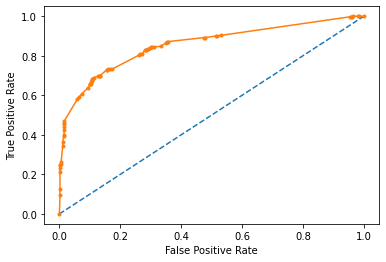

In [43]:
probs = best_grid.predict_proba(X_train)
probs = probs[:,1]
auc=roc_auc_score(y_train,probs)
print("AUC: %.3f" % auc)
fpr,tpr,thresholds = roc_curve(y_train, probs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [44]:
bestmlp_output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': mlp_y_test_predict})
bestmlp_output.to_csv('bestmlp_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Decision tree classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [46]:
y_train=df['Survived']

features =['Pclass','Sex','SibSp','Parch']
X_train=pd.get_dummies(df[features])
X_test= pd.get_dummies(df2[features])

In [47]:
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

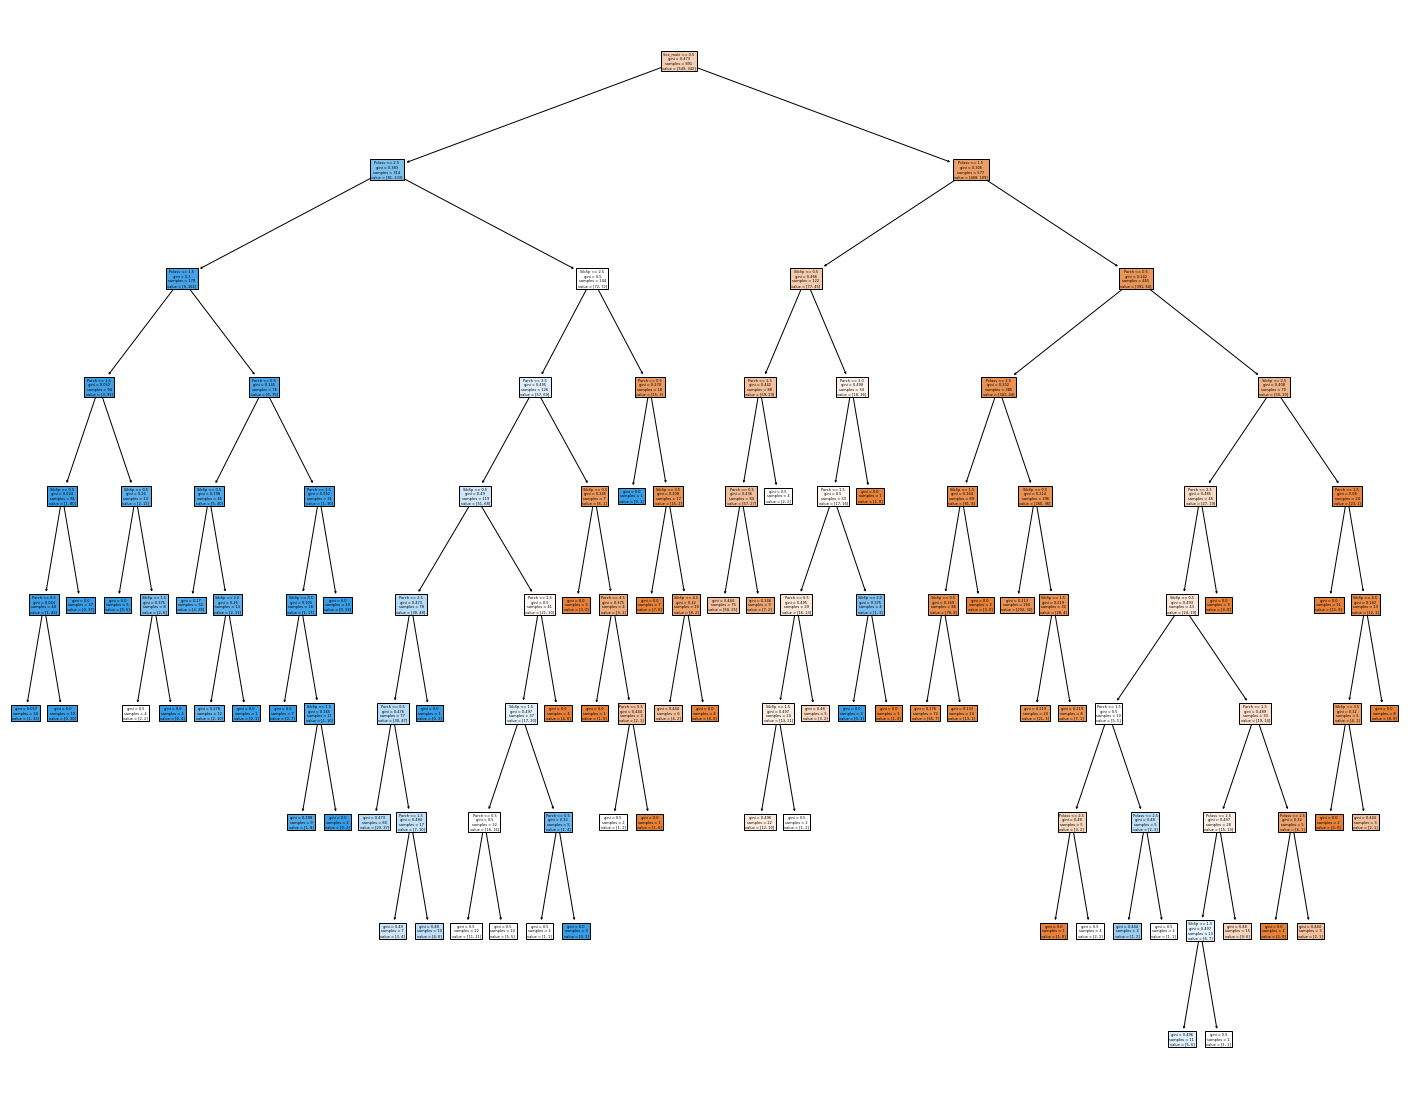

In [48]:
plt.figure(figsize=(25,20))
_=tree.plot_tree(dtc,
            feature_names=X_train.columns,
                filled=True)

In [49]:
train_char_lable = ['No', 'Yes']
ld_tree_file = open('ld_tree_file.dot','w')
dot_tree=tree.export_graphviz(dtc,
                     out_file=ld_tree_file,
                     feature_names=list(X_train),
                     class_names=list(train_char_lable)
                    )
                              
ld_tree_file.close()
(pd.DataFrame(dtc.feature_importances_,columns=["Imp"],index=X_train.columns)).sort_values('Imp',ascending=False)

,Imp
Sex_male,0.626655
Pclass,0.214077
SibSp,0.082820
Parch,0.076448
Sex_female,0.000000


In [50]:
dtc_y_train_predict= dtc.predict(X_train)
dtc_y_test_predict = dtc.predict(X_test)

In [51]:
dtc.score(X_train,y_train)

0.8170594837261503

In [52]:
confusion_matrix(y_train,dtc_y_train_predict)

array([[506,  43],
       [120, 222]], dtype=int64)

In [53]:
print(classification_report(y_train,dtc_y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       549
           1       0.84      0.65      0.73       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.81       891



In [54]:
dtc_output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': dtc_y_test_predict})
dtc_output.to_csv('dtc_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Regularized decision tree

In [55]:
regdtc = DecisionTreeClassifier(criterion='gini',max_depth=30,min_samples_leaf=100,min_samples_split=1000,random_state=1)
regdtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000, random_state=1)

In [56]:
regld_tree_file = open('regld_tree_file','w')
tree.export_graphviz(regdtc,
                     out_file='regld_tree_file',
                     feature_names=X_train.columns,
                     class_names=list(train_char_lable)
                    )
regld_tree_file.close()

In [57]:
(pd.DataFrame(regdtc.feature_importances_,columns=["Imp"],index=X_train.columns)).sort_values('Imp',ascending=False)

,Imp
Pclass,0.0
SibSp,0.0
Parch,0.0
Sex_female,0.0
Sex_male,0.0


## Clustering

In [58]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [59]:
df_clus= df.copy()
df_clus

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
df_clus.drop(columns=['Name'],inplace=True)

In [61]:
df[features]

,Pclass,Sex,SibSp,Parch
0,3,male,1,0
1,1,female,1,0
2,3,female,0,0
3,1,female,1,0
4,3,male,0,0
...,...,...,...,...
886,2,male,0,0
887,1,female,0,0
888,3,female,1,2
889,1,male,0,0


In [62]:
link_method = linkage(df_clus.iloc[:,0:12],method='average')

ValueError: could not convert string to float: 'male'

In [ ]:
clusters = fcluster(link_method,2,criterion='maxclust')
clusters

## Logistic Regression